# Objectives and Steps for Data Analysis and Model Building
## Objectives

1. **Explore the Dataset**
   - Uncover patterns, distributions, and relationships within the data.

2. **Conduct Extensive Exploratory Data Analysis (EDA)**
   - Dive deep into bivariate relationships against the target.

## Preprocessing Steps

1. **Remove Irrelevant Features**
   - Identify and drop features that do not contribute to the analysis or model performance.

2. **Address Missing Values**
   - Impute or remove missing values to ensure data completeness.

3. **Treat Outliers**
   - Detect and handle outliers to improve model accuracy.

4. **Encode Categorical Variables**
   - Convert categorical features into numerical values using techniques like one-hot encoding or label encoding.

5. **Transform Skewed Features**
   - Apply transformations to skewed features to achieve normal-like distributions, improving model performance.

## Model Building

1. **Establish Pipelines for Models Requiring Scaling**
   - Implement pipelines that include scaling steps for models that require feature normalization.

2. **Implement and Tune Classification Models**
   - **K-Nearest Neighbors (KNN)**
   - **Support Vector Machines (SVM)**
   - **Decision Trees**
   - **Random Forest**
   - Focus on tuning hyperparameters to optimize performance.

3. **Emphasize High Recall for Class 1**
   - Ensure comprehensive identification of heart patients by prioritizing recall for class 1.

## Evaluate and Compare Model Performance

1. **Metrics to Use**
   - **Precision**
   - **Recall**
   - **F1-score**

2. **Evaluate Models**
   - Compare model performance using the aforementioned metrics to determine the most effective model.


# Table of Contents

1. **Step 1 | Import Libraries**
2. **Step 2 | Read Dataset**
3. **Step 3 | Dataset Overview**
   - **Step 3.1 | Dataset Basic Information**
   - **Step 3.2 | Summary Statistics for Numerical Variables**
   - **Step 3.3 | Summary Statistics for Categorical Variables**
4. **Step 4 | EDA**
   - **Step 4.1 | Univariate Analysis**
     - **Step 4.1.1 | Numerical Variables Univariate Analysis**
     - **Step 4.1.2 | Categorical Variables Univariate Analysis**
   - **Step 4.2 | Bivariate Analysis**
     - **Step 4.2.1 | Numerical Features vs Target**
     - **Step 4.2.2 | Categorical Features vs Target**
5. **Step 5 | Data Preprocessing**
   - **Step 5.1 | Irrelevant Features Removal**
   - **Step 5.2 | Missing Value Treatment**
   - **Step 5.3 | Outlier Treatment**
   - **Step 5.4 | Categorical Features Encoding**
   - **Step 5.5 | Feature Scaling**
   - **Step 5.6 | Transforming Skewed Features**
6. **Step 6 | Decision Tree Model Building**
   - **Step 6.1 | DT Base Model Definition**
   - **Step 6.2 | DT Hyperparameter Tuning**
   - **Step 6.3 | DT Model Evaluation**
7. **Step 7 | Random Forest Model Building**
   - **Step 7.1 | RF Base Model Definition**
   - **Step 7.2 | RF Hyperparameter Tuning**
   - **Step 7.3 | RF Model Evaluation**
8. **Step 8 | KNN Model Building**
   - **Step 8.1 | KNN Base Model Definition**
   - **Step 8.2 | KNN Hyperparameter Tuning**
   - **Step 8.3 | KNN Model Evaluation**
9. **Step 9 | SVM Model Building**
   - **Step 9.1 | SVM Base Model Definition**
   - **Step 9.2 | SVM Hyperparameter Tuning**
   - **Step 9.3 | SVM Model Evaluation**
10. **Step 10 | Conclusion**


## step 1: Import the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

### step 2 :read the dataset

In [4]:
df = pd.read_csv("heart.csv")
df.head(10) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Dataset Description

| Variable   | Description                                                                                   |
|------------|-----------------------------------------------------------------------------------------------|
| `age`      | Age of the patient in years                                                                   |
| `sex`      | Gender of the patient (0 = male, 1 = female)                                                 |
| `cp`       | Chest pain type:                                                                            |
|            | 0: Typical angina                                                                           |
|            | 1: Atypical angina                                                                          |
|            | 2: Non-anginal pain                                                                         |
|            | 3: Asymptomatic                                                                            |
| `trestbps` | Resting blood pressure in mm Hg                                                               |
| `chol`     | Serum cholesterol in mg/dl                                                                    |
| `fbs`      | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)               |
| `restecg`  | Resting electrocardiographic results:                                                         |
|            | 0: Normal                                                                                   |
|            | 1: Having ST-T wave abnormality                                                               |
|            | 2: Showing probable or definite left ventricular hypertrophy                                 |
| `thalach`  | Maximum heart rate achieved during a stress test                                              |
| `exang`    | Exercise-induced angina (1 = yes, 0 = no)                                                     |
| `oldpeak`  | ST depression induced by exercise relative to rest                                            |
| `slope`    | Slope of the peak exercise ST segment:                                                        |
|            | 0: Upsloping                                                                                |
|            | 1: Flat                                                                                     |
|            | 2: Downsloping                                                                              |
| `ca`       | Number of major vessels (0-4) colored by fluoroscopy                                         |
| `thal`     | Thalium stress test result:                                                                   |
|            | 0: Normal                                                                                   |
|            | 1: Fixed defect                                                                             |
|            | 2: Reversible defect                                                                         |
|            | 3: Not described                                                                            |
| `target`   | Heart disease status (0 = no disease, 1 = presence of disease)                               |


## step3: Dataset Overview

### Step 3.1 | Dataset Basic Information

In [5]:
print(f"The total number of the rows in the data is {df.shape[0]}")
print(f"The total number of the columns in the data is {df.shape[1]}")
print(f"The total numner of the missing value in the data is {df.isna().sum().sum()}")
print(f"The total number of the duplicated rows in the data is {df.duplicated().sum()}")
print(df.columns.tolist()) 

The total number of the rows in the data is 303
The total number of the columns in the data is 14
The total numner of the missing value in the data is 0
The total number of the duplicated rows in the data is 1
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Inferences

1. **Number of Entries**
   - The dataset consists of **303 entries**, ranging from index **0** to **302**.

2. **Columns**
   - There are **14 columns** in the dataset, corresponding to various attributes of the patients and results of tests.

3. **Data Types**
   - Most of the columns (**13 out of 14**) are of the `int64` data type.
   - Only the `oldpeak` column is of the `float64` data type.

4. **Missing Values**
   - There don't appear to be any missing values in the dataset, as each column has **303 non-null entries**.


# Note

Based on the data types and the feature explanations provided earlier, we observe that **9 columns** (namely `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are indeed numerical in terms of data type. However, they are categorical in terms of their semantics.

These features should be converted to the `string` (or `object`) data type for proper analysis and interpretation.


In [7]:
continous_feauters = ["age", "trestbps", "chol", "thalach", "oldpeak"] 
feauters_to_convert = [feauter for feauter in df.columns if feauter not in continous_feauters] 
df[feauters_to_convert] = df[feauters_to_convert].astype("object")
df.dtypes 

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

### Step 3.2 | Summary Statistics for Numerical Variables

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Numerical Features

- **`age`**: 
  - The average age of the patients is approximately **54.4 years**.
  - The youngest patient is **29 years** old, and the oldest is **77 years** old.

- **`trestbps`**: 
  - The average resting blood pressure is about **131.62 mm Hg**.
  - The range is from **94 mm Hg** to **200 mm Hg**.

- **`chol`**: 
  - The average cholesterol level is approximately **246.26 mg/dl**.
  - The minimum cholesterol level is **126 mg/dl**, and the maximum is **564 mg/dl**.

- **`thalach`**: 
  - The average maximum heart rate achieved is around **149.65**.
  - The range is from **71** to **202**.

- **`oldpeak`**: 
  - The average ST depression induced by exercise relative to rest is about **1.04**.
  - The values range from **0** to **6.2**.


### Step 3.3 | Summary Statistics for Categorical Variables

In [9]:
df.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


# Categorical Features (object data type)

- **`sex`**: 
  - There are two unique values.
  - **Males** (denoted as `1`) are the most frequent category, occurring **207** times out of **303** entries.

- **`cp`**: 
  - Four unique types of chest pain are present.
  - The most common type is **"0"**, occurring **143** times.

- **`fbs`**: 
  - There are two categories.
  - The most frequent category is **"0"** (indicating fasting blood sugar less than 120 mg/dl), which appears **258** times.

- **`restecg`**: 
  - Three unique results are present.
  - The most common result is **"1"**, appearing **152** times.

- **`exang`**: 
  - There are two unique values.
  - The most frequent value is **"0"** (indicating no exercise-induced angina), which is observed **204** times.

- **`slope`**: 
  - Three unique slopes are present.
  - The most frequent slope type is **"2"**, which occurs **142** times.

- **`ca`**: 
  - There are five unique values for the number of major vessels colored by fluoroscopy.
  - **"0"** is the most frequent, occurring **175** times.

- **`thal`**: 
  - Four unique results are available.
  - The most common type is **"2"** (indicating a reversible defect), observed **166** times.

- **`target`**: 
  - Two unique values indicate the presence or absence of heart disease.
  - The value **"1"** (indicating the presence of heart disease) is the most frequent, observed in **165** entries.


### step 4: EDA

# Exploratory Data Analysis (EDA)

For our Exploratory Data Analysis (EDA), we'll take it in two main steps:

1. **Univariate Analysis**
   - Focus on one feature at a time to understand its distribution and range.
   - This step helps us to analyze the characteristics of each individual feature.

2. **Bivariate Analysis**
   - Explore the relationship between each feature and the target variable.
   - This helps us determine the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and understand how each feature relates to our main goal: predicting the target variable.


### Step 4.1 | Univariate Analysis

# Univariate Analysis

We undertake univariate analysis on the dataset's features based on their datatype:

- **For Continuous Data**
  - We employ **histograms** to gain insight into the distribution of each feature.
  - This approach helps us understand the central tendency, spread, and shape of the dataset's distribution.

- **For Categorical Data**
  - **Bar plots** are utilized to visualize the frequency of each category.
  - This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we’re better positioned to understand the individual characteristics of each feature in the dataset.


#### Step 4.1.1 | Numerical Variables Univariate Analysis

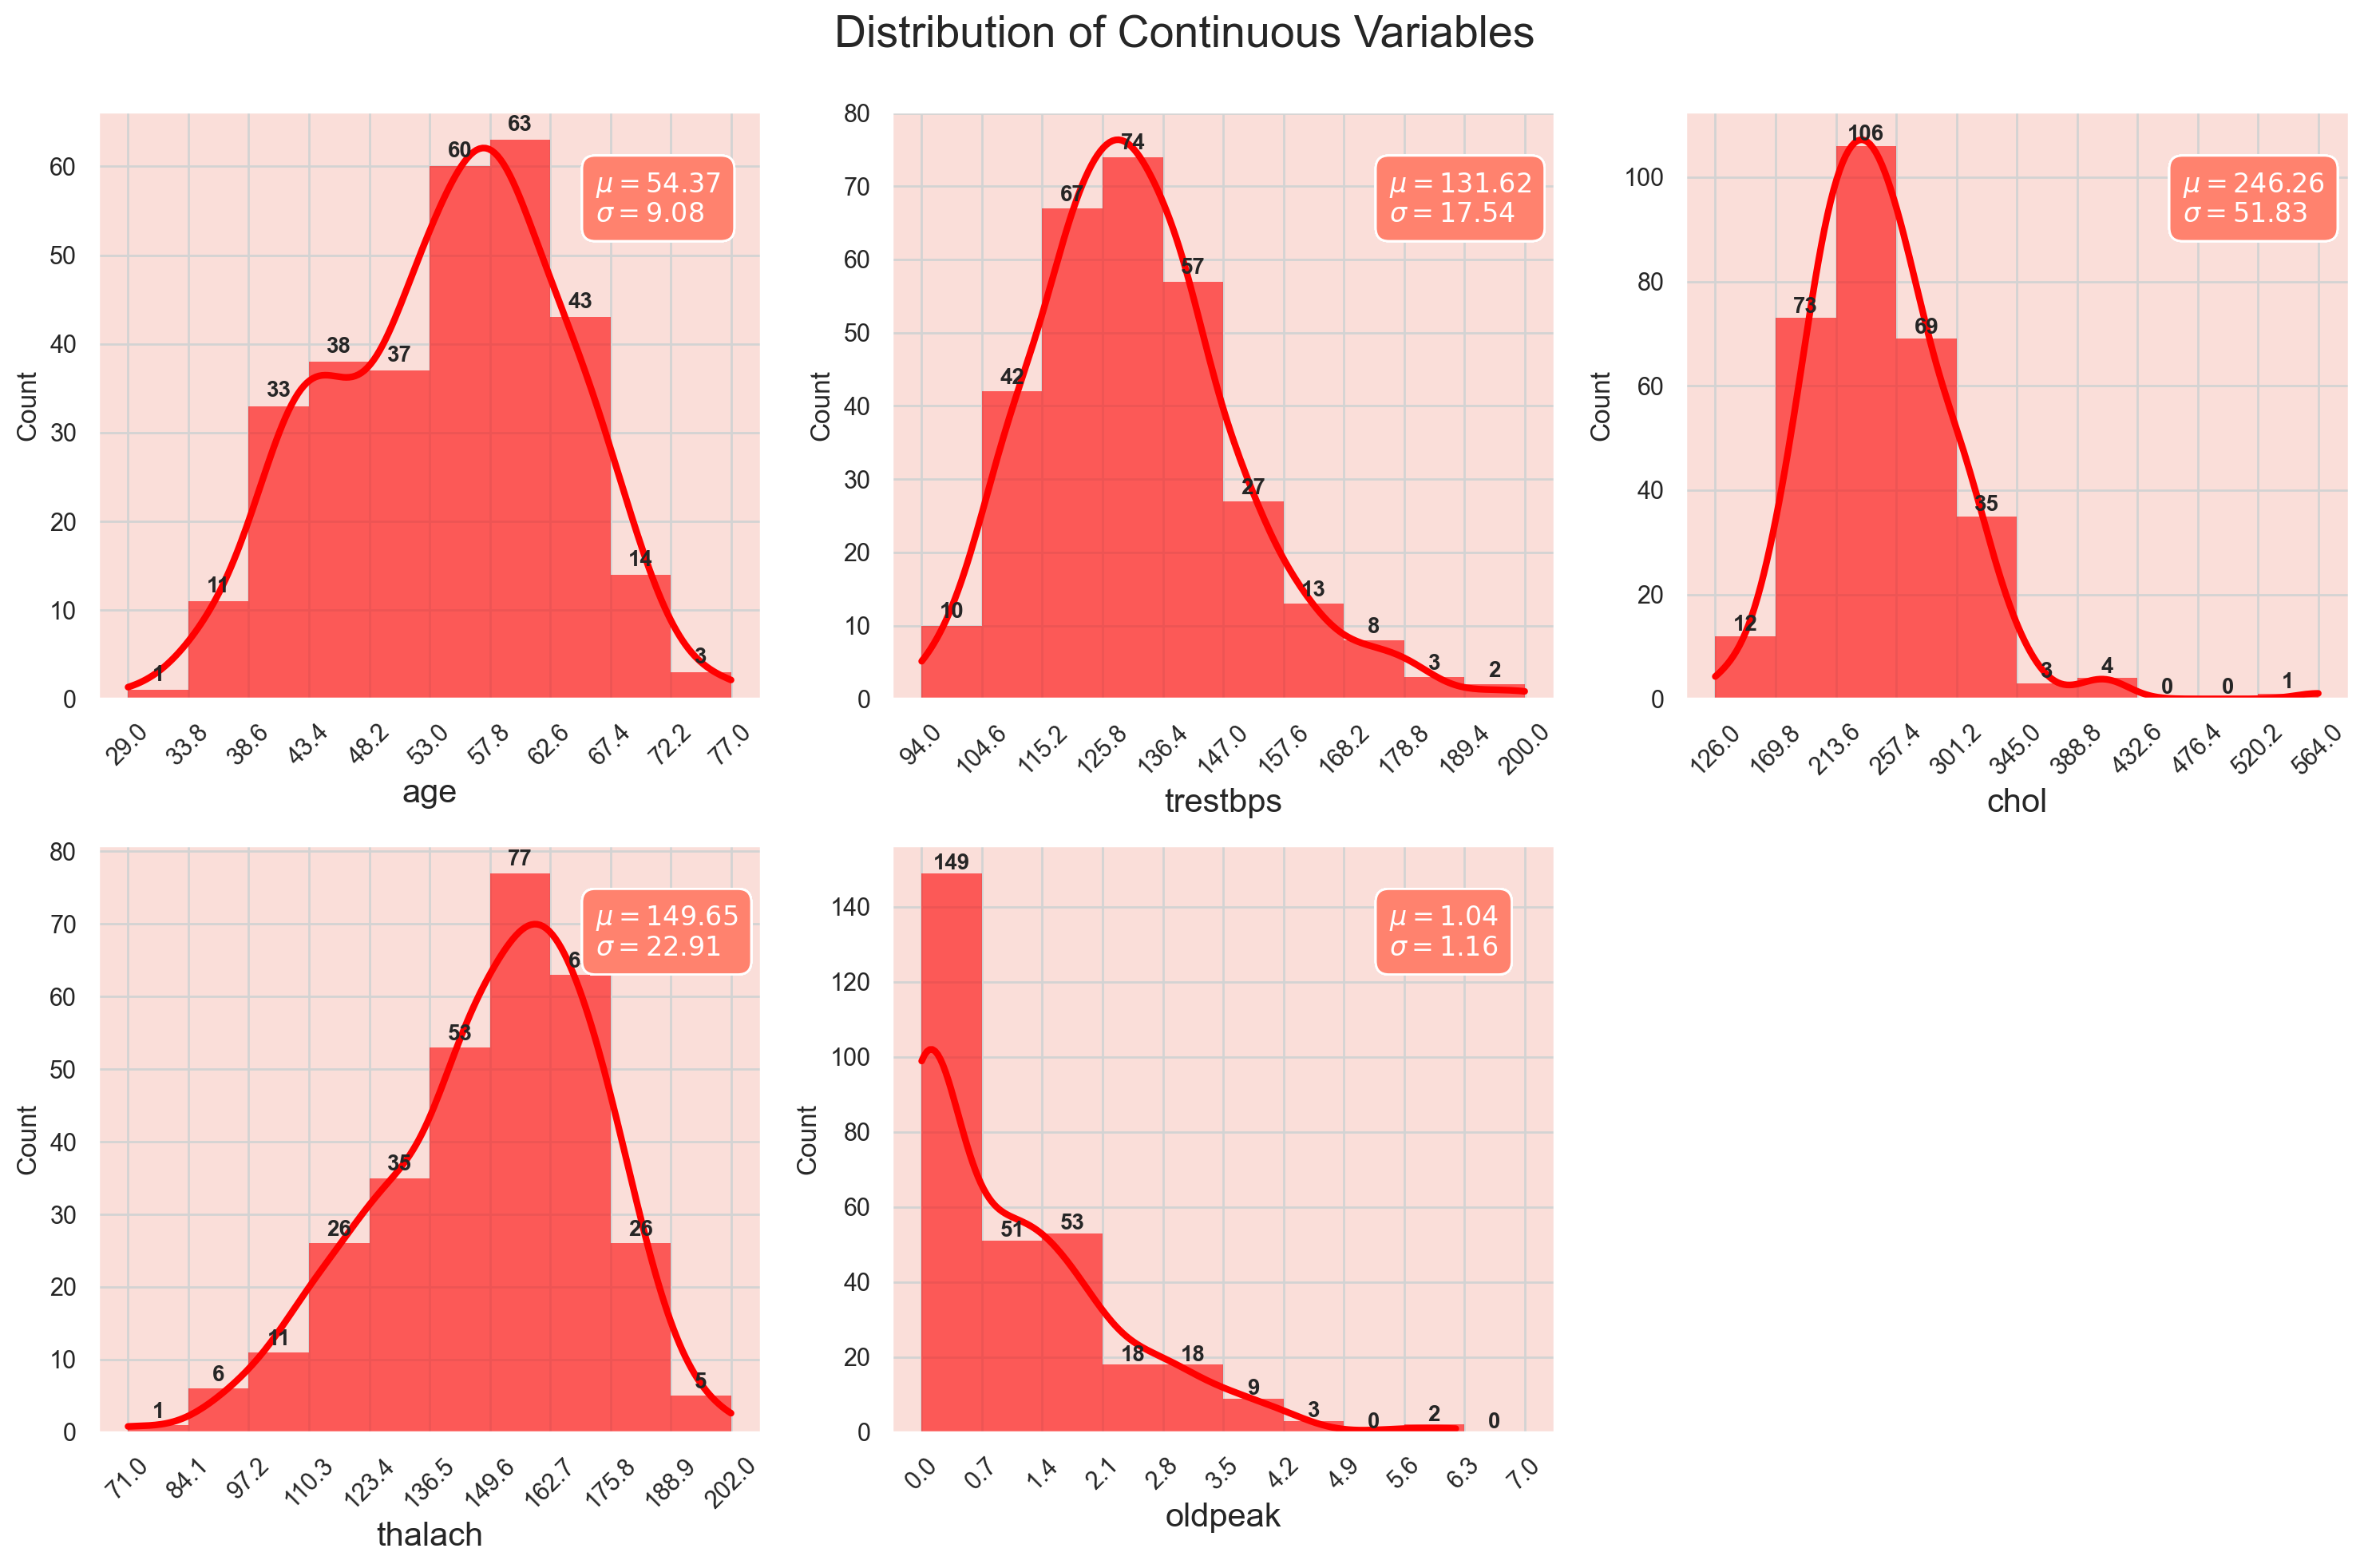

In [10]:
df_continous = df[continous_feauters] 
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, col in enumerate(df_continous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continous[col], range=(np.floor(df_continous[col].min()), np.ceil(df_continous[col].max())))
    graph = sns.histplot(data=df_continous, x=col, bins=bin_edges, kde=True, ax=ax[x, y], edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1)) 
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    for j, p in enumerate(graph.patches): 
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha='center', fontsize=10, fontweight="bold")
        textstr = '\n'.join(( 
        r'$\mu=%.2f$' % df_continous[col].mean(),
        r'$\sigma=%.2f$' % df_continous[col].std()
        ))
        ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top', color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))
        ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### Inferences

**Age (age):** 
- The distribution is somewhat uniform, with a noticeable peak around the late 50s.
- **Mean Age:** Approximately 54.37 years
- **Standard Deviation:** 9.08 years

**Resting Blood Pressure (trestbps):** 
- Most individuals have resting blood pressure concentrated around 120-140 mm Hg.
- **Mean Resting Blood Pressure:** Approximately 131.62 mm Hg
- **Standard Deviation:** 17.54 mm Hg

**Serum Cholesterol (chol):** 
- Cholesterol levels for most individuals fall between 200 and 300 mg/dl.
- **Mean Cholesterol Level:** Around 246.26 mg/dl
- **Standard Deviation:** 51.83 mg/dl

**Maximum Heart Rate Achieved (thalach):** 
- The majority achieve a heart rate between 140 and 170 bpm during a stress test.
- **Mean Heart Rate Achieved:** Approximately 149.65 bpm
- **Standard Deviation:** 22.91 bpm

**ST Depression Induced by Exercise (oldpeak):** 
- Most values are concentrated towards 0, indicating minimal ST depression during exercise for many individuals.
- **Mean ST Depression Value:** 1.04
- **Standard Deviation:** 1.16

Upon reviewing the histograms of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges. There doesn't seem to be any noticeable noise or implausible values among the continuous variables.


### Step 4.1.2 | Categorical Variables Univariate Analysis

In [11]:
categorical_features = df.columns.difference(continous_feauters) 
df_categorical = df[categorical_features] 
df_categorical.head(10)

,ca,cp,exang,fbs,restecg,sex,slope,target,thal
0,0,3,0,1,0,1,0,1,1
1,0,2,0,0,1,1,0,1,2
2,0,1,0,0,0,0,2,1,2
3,0,1,0,0,1,1,2,1,2
4,0,0,1,0,1,0,2,1,2
5,0,0,0,0,1,1,1,1,1
6,0,1,0,0,0,0,1,1,2
7,0,1,0,0,1,1,2,1,3
8,0,2,0,1,1,1,2,1,3
9,0,2,0,0,1,1,2,1,2


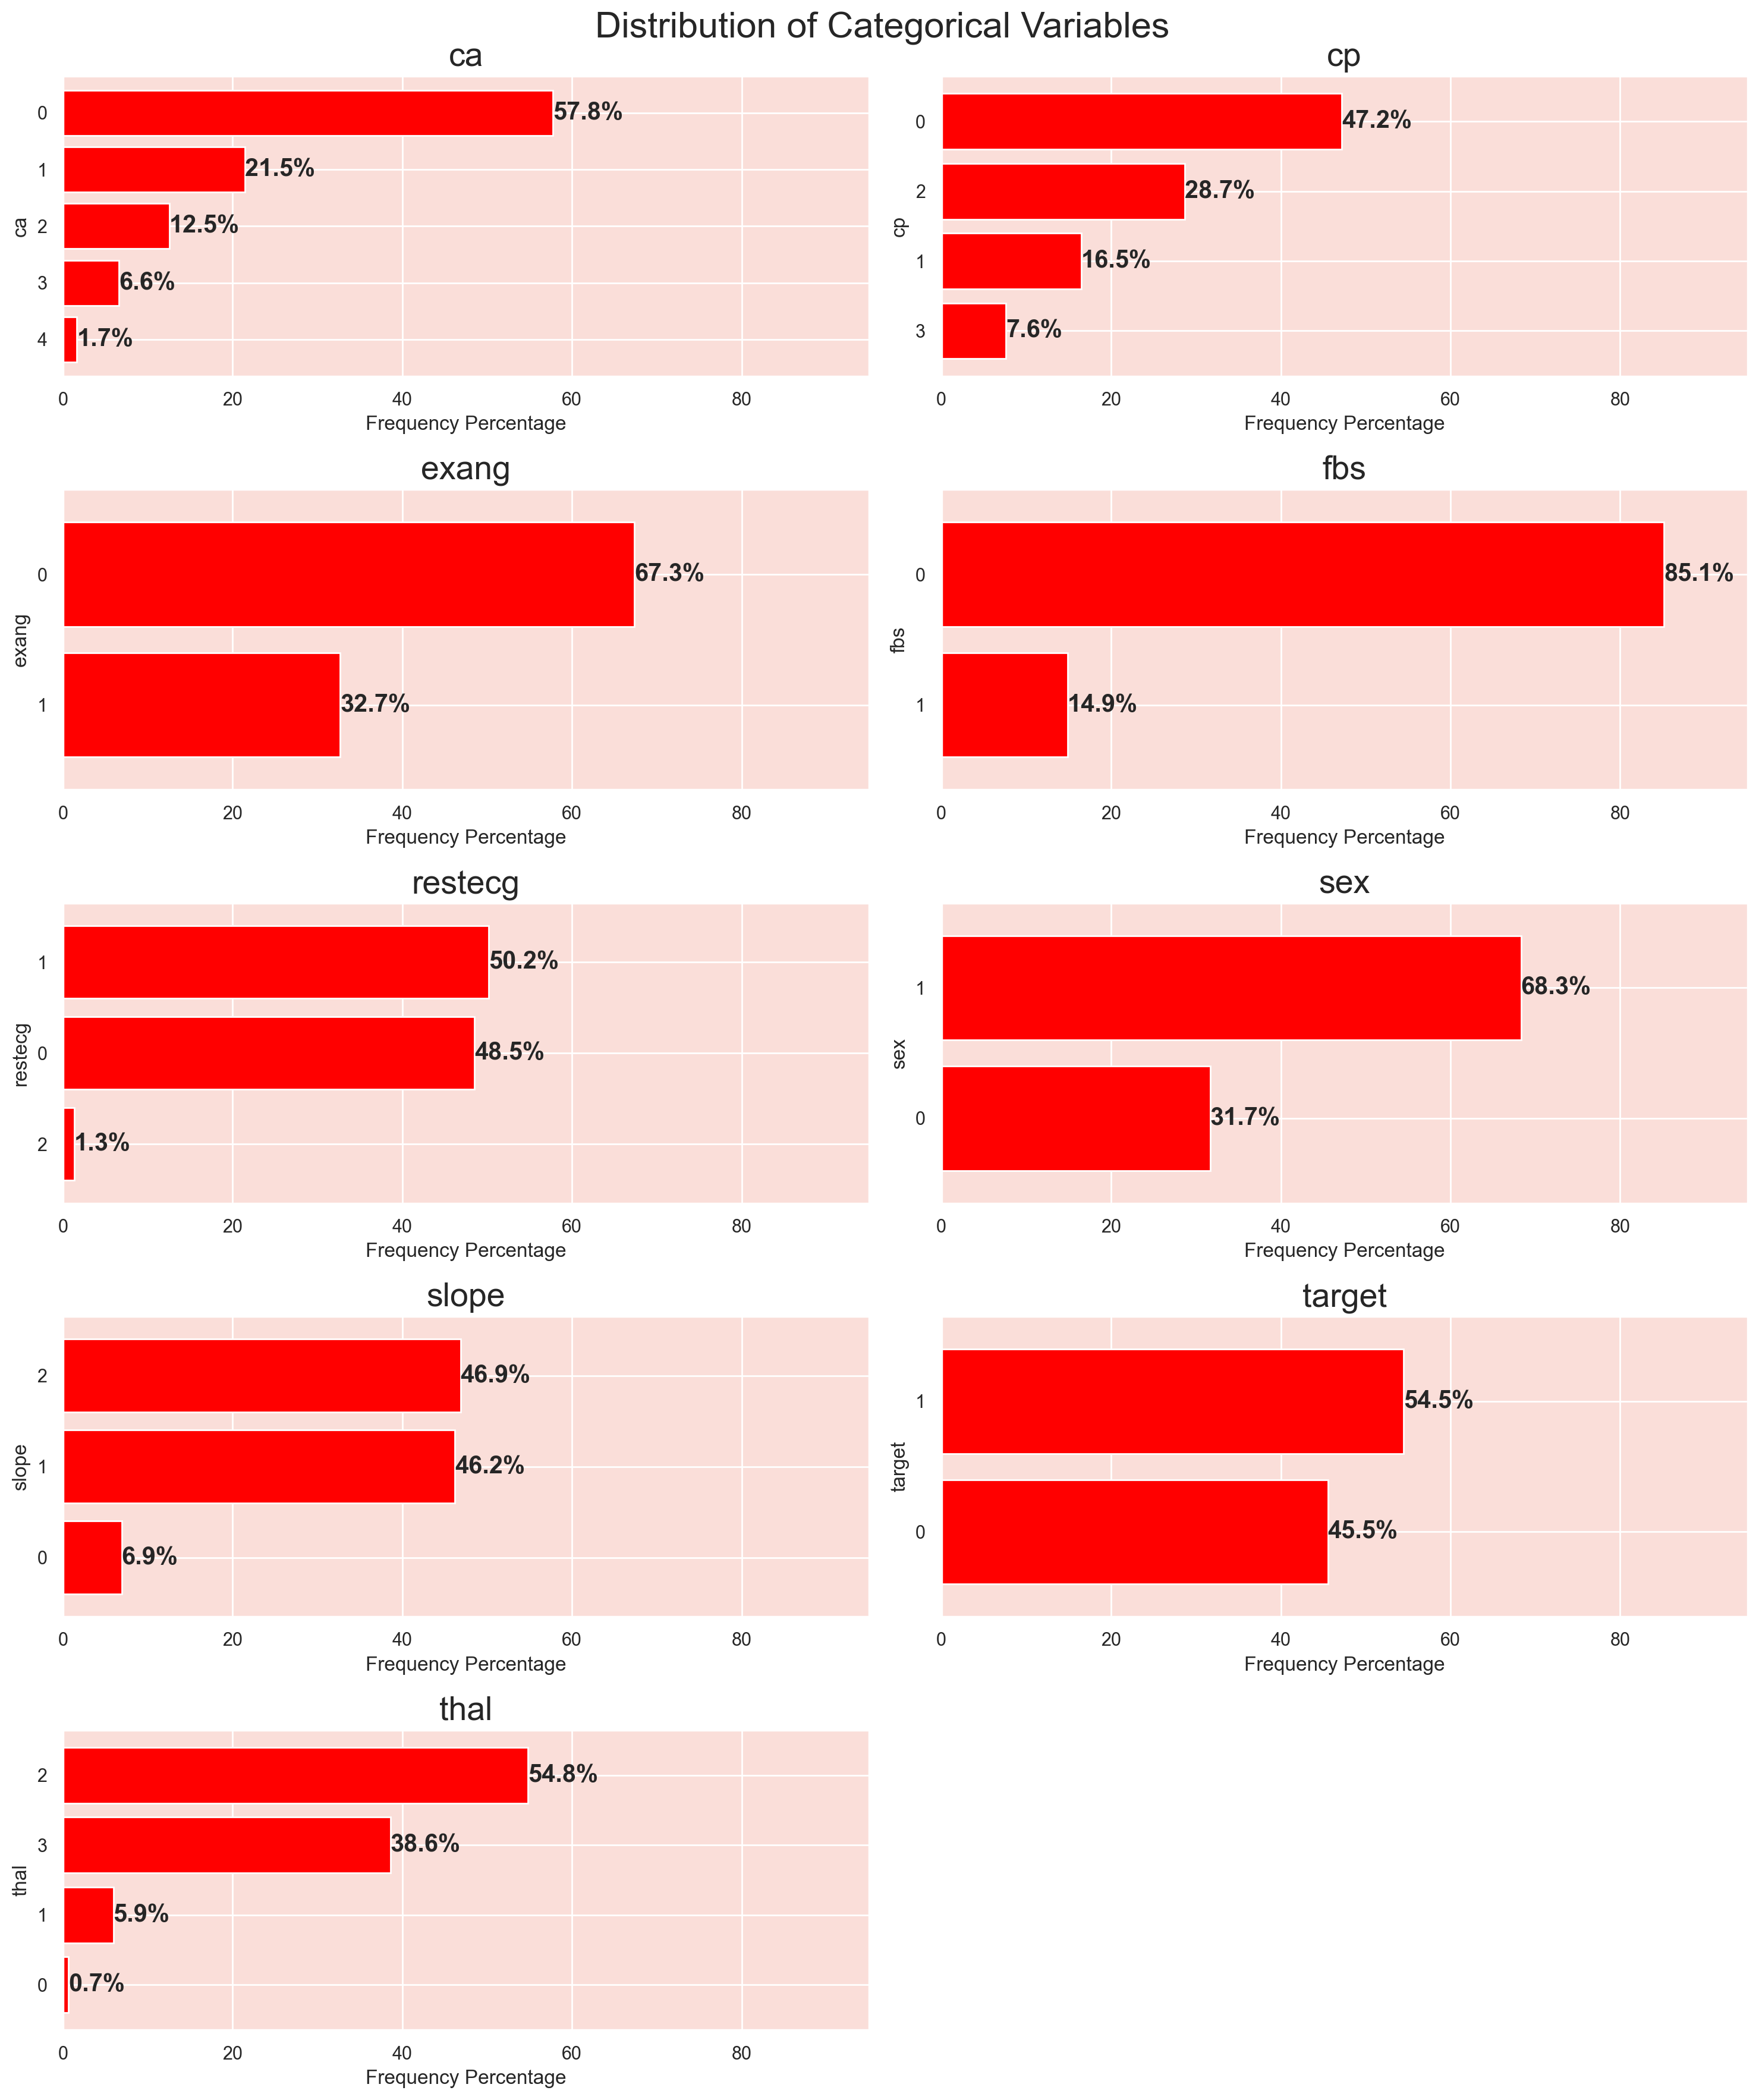

In [13]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18)) 
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values() 
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    ax[row, col_idx].set_xlim([0, 95]) 
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12) 
    ax[row, col_idx].set_title(f'{col}', fontsize=20)
ax[4,1].axis('off') 
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Inferences

- **Gender (sex)**: The dataset is predominantly female, constituting a significant majority.

- **Type of Chest Pain (cp)**: The dataset shows varied chest pain types among patients. Type 0 (Typical angina) seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.

- **Fasting Blood Sugar (fbs)**: A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

- **Resting Electrocardiographic Results (restecg)**: The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.

- **Exercise-Induced Angina (exang)**: A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.

- **Slope of the Peak Exercise ST Segment (slope)**: The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.

- **Number of Major Vessels Colored by Fluoroscopy (ca)**: Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.

- **Thalium Stress Test Result (thal)**: The dataset displays a variety of thalium stress test results. One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.

- **Presence of Heart Disease (target)**: The dataset is nearly balanced in terms of heart disease presence, with about 54.5% having it and 45.5% not having it.


### Step 4.2 | Bivariate Analysis

## Bivariate Analysis

For our bivariate analysis on the dataset's features with respect to the target variable:

- **For Continuous Data**: 
  - We will use bar plots to showcase the average value of each feature for the different target classes.
  - KDE (Kernel Density Estimation) plots will be used to understand the distribution of each feature across the target classes.
  - This approach helps in discerning how each feature varies between the two target outcomes.

- **For Categorical Data**: 
  - We will employ 100% stacked bar plots to depict the proportion of each category across the target classes.
  - This offers a comprehensive view of how different categories within a feature relate to the target.

Through these visualization techniques, we aim to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.


#### Step 4.2.1 | Numerical Features vs Target

## Visualization of Continuous Features Against the Target

I am going to visualize each continuous feature against the target using two types of charts:

- **Bar Plots**: These will show the mean values of each continuous feature for different target categories.
  
- **KDE Plots**: These will display the distribution of each continuous feature across the target categories.

These visualizations will help in understanding how each continuous feature varies with respect to the target and provide insights into potential predictors.


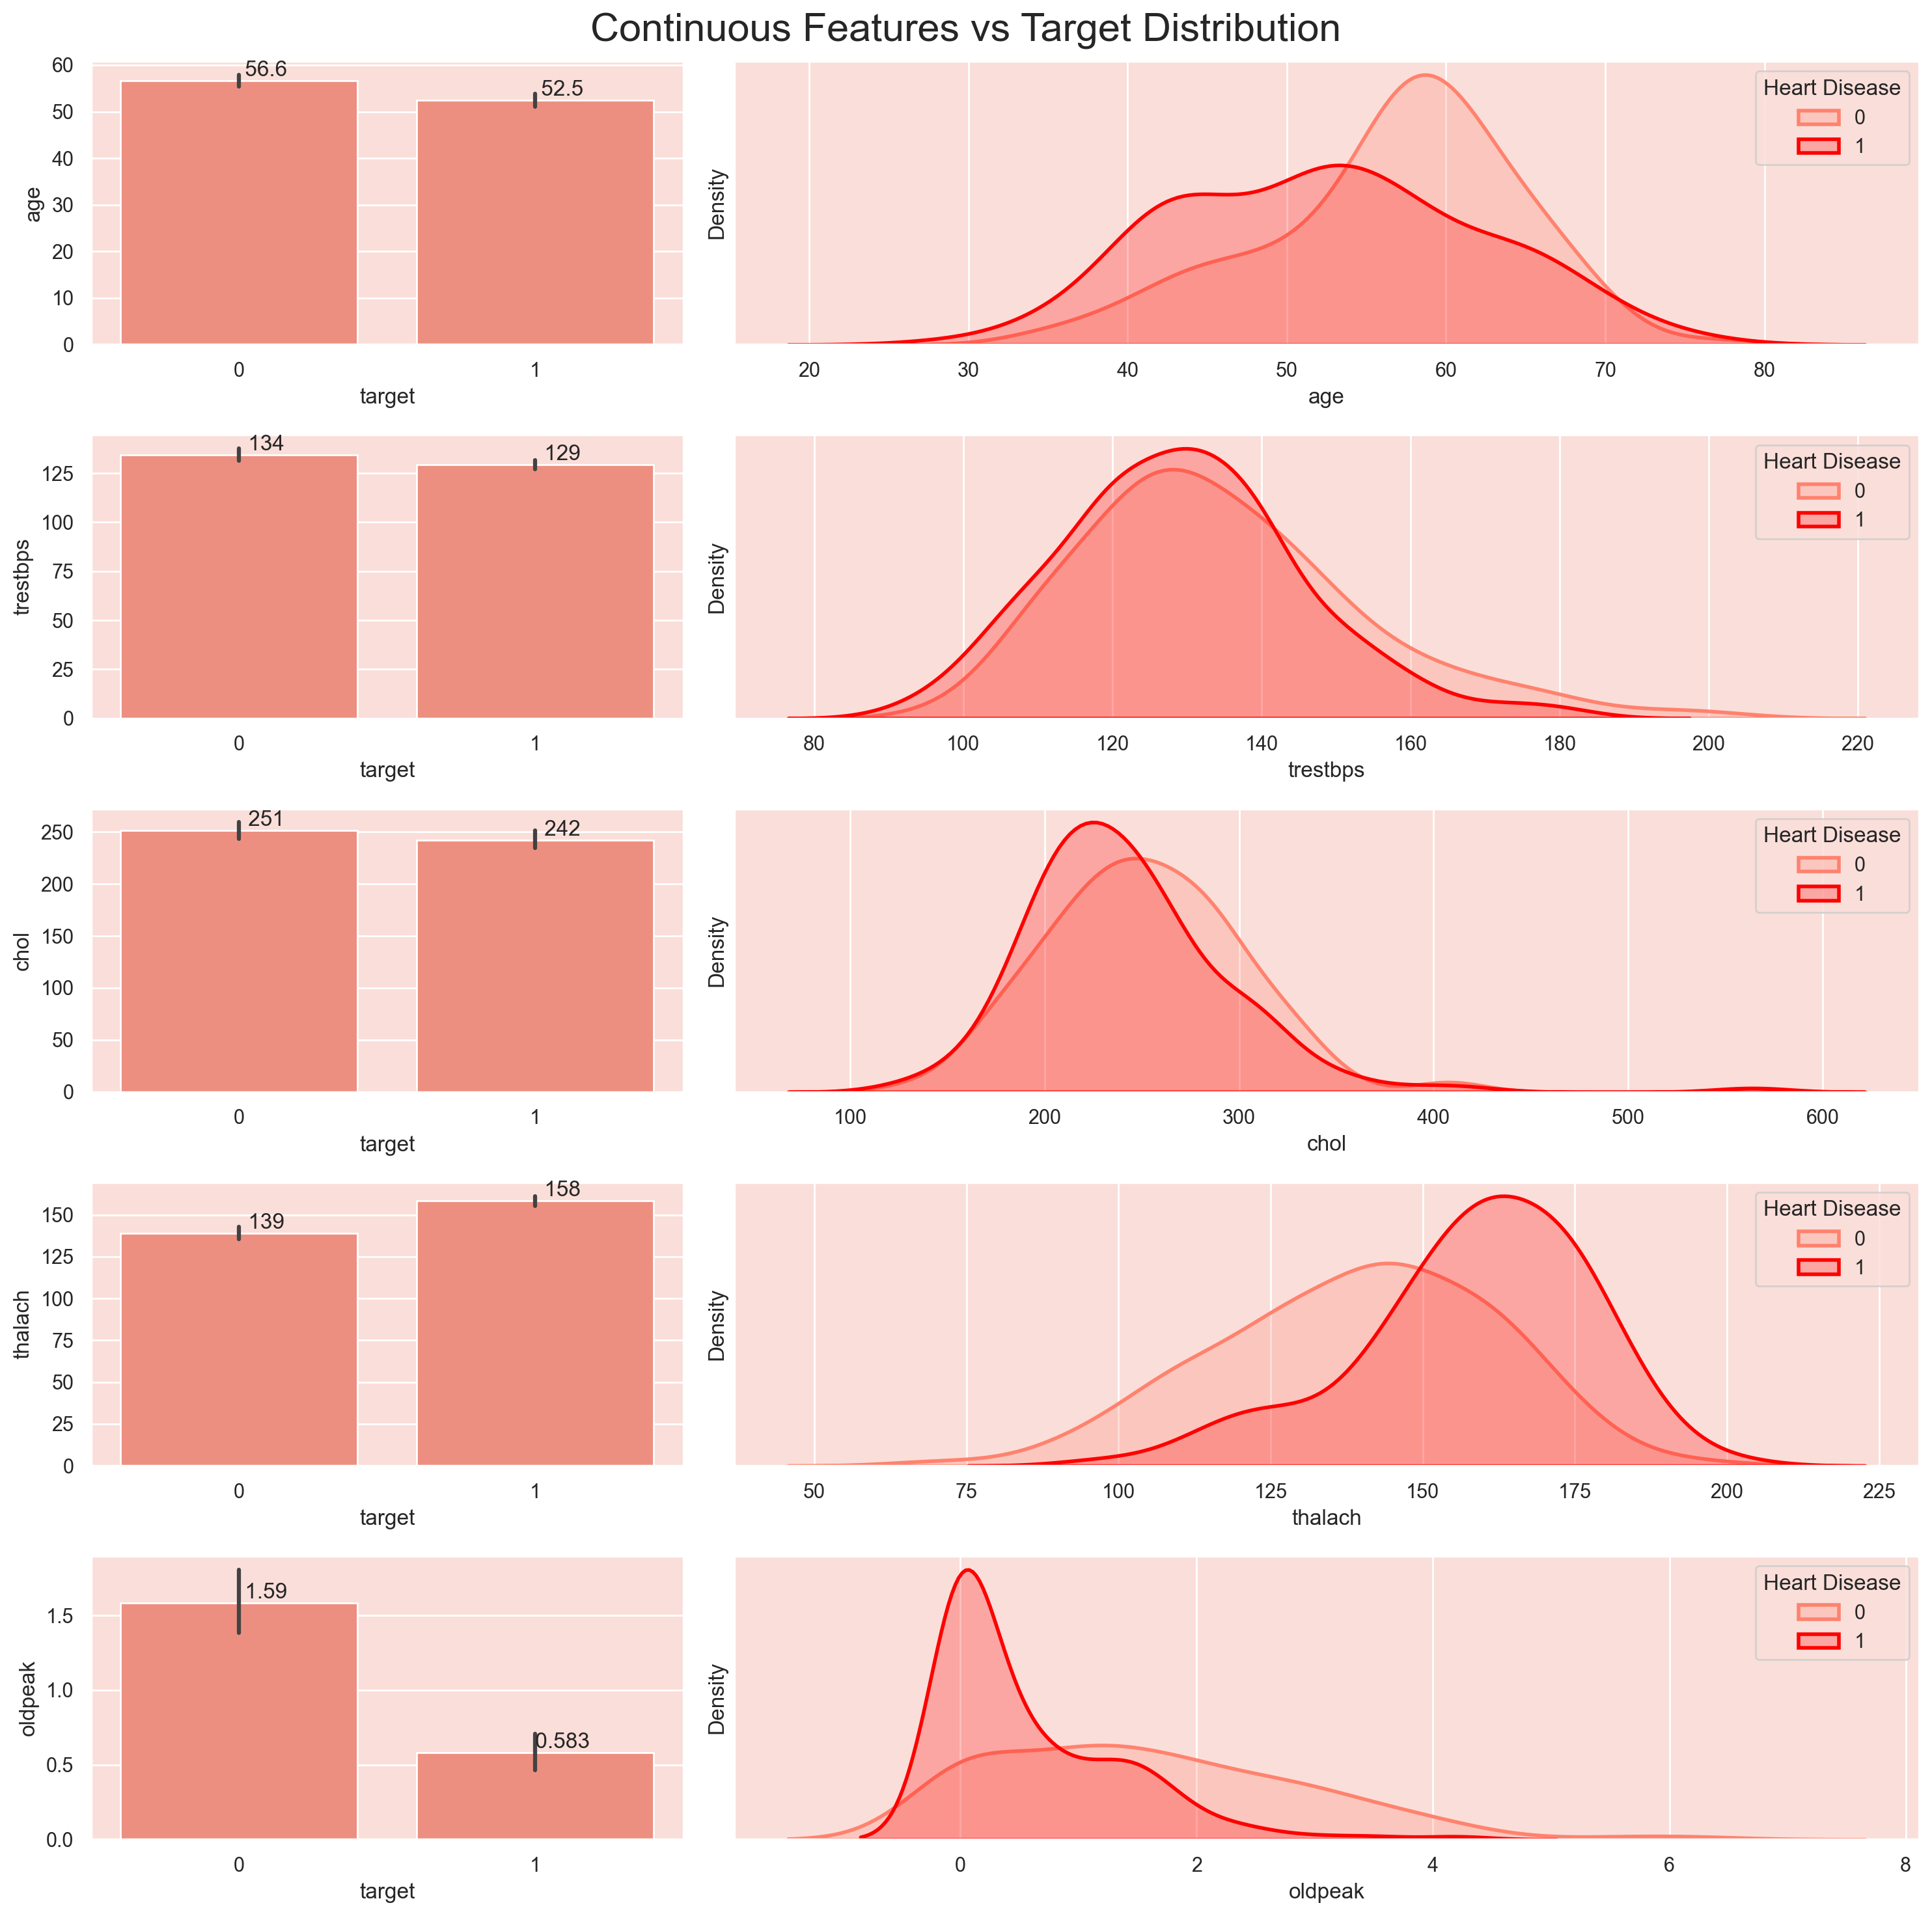

In [ ]:
sns.set_palette(['#ff826e', 'red'])
fig, ax = plt.subplots(len(continous_feauters), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})
for i, col in enumerate(continous_feauters):
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([]) 
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    for cont in graph.containers: 
        graph.bar_label(cont, fmt='         %.3g')
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

### Inferences:

- **Age (age):** The distributions show a slight shift, with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.
  
- **Resting Blood Pressure (trestbps):** Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.
  
- **Serum Cholesterol (chol):** The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.
  
- **Maximum Heart Rate Achieved (thalach):** There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.
  
- **ST Depression (oldpeak):** The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.
  
### Conclusion:
Based on the visual difference in distributions and mean values, **Maximum Heart Rate (thalach)** seems to have the most impact on heart disease status, followed by **ST Depression (oldpeak)** and **Age (age)**.


### Step 4.2.2 | Categorical Features vs Target

#### I am going to display 100% stacked bar plots for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.

In [15]:
categorical_features = [feature for feature in categorical_features if feature != 'target'] # hena ana 7ageeb el categorical feauters bss men 8eer el target

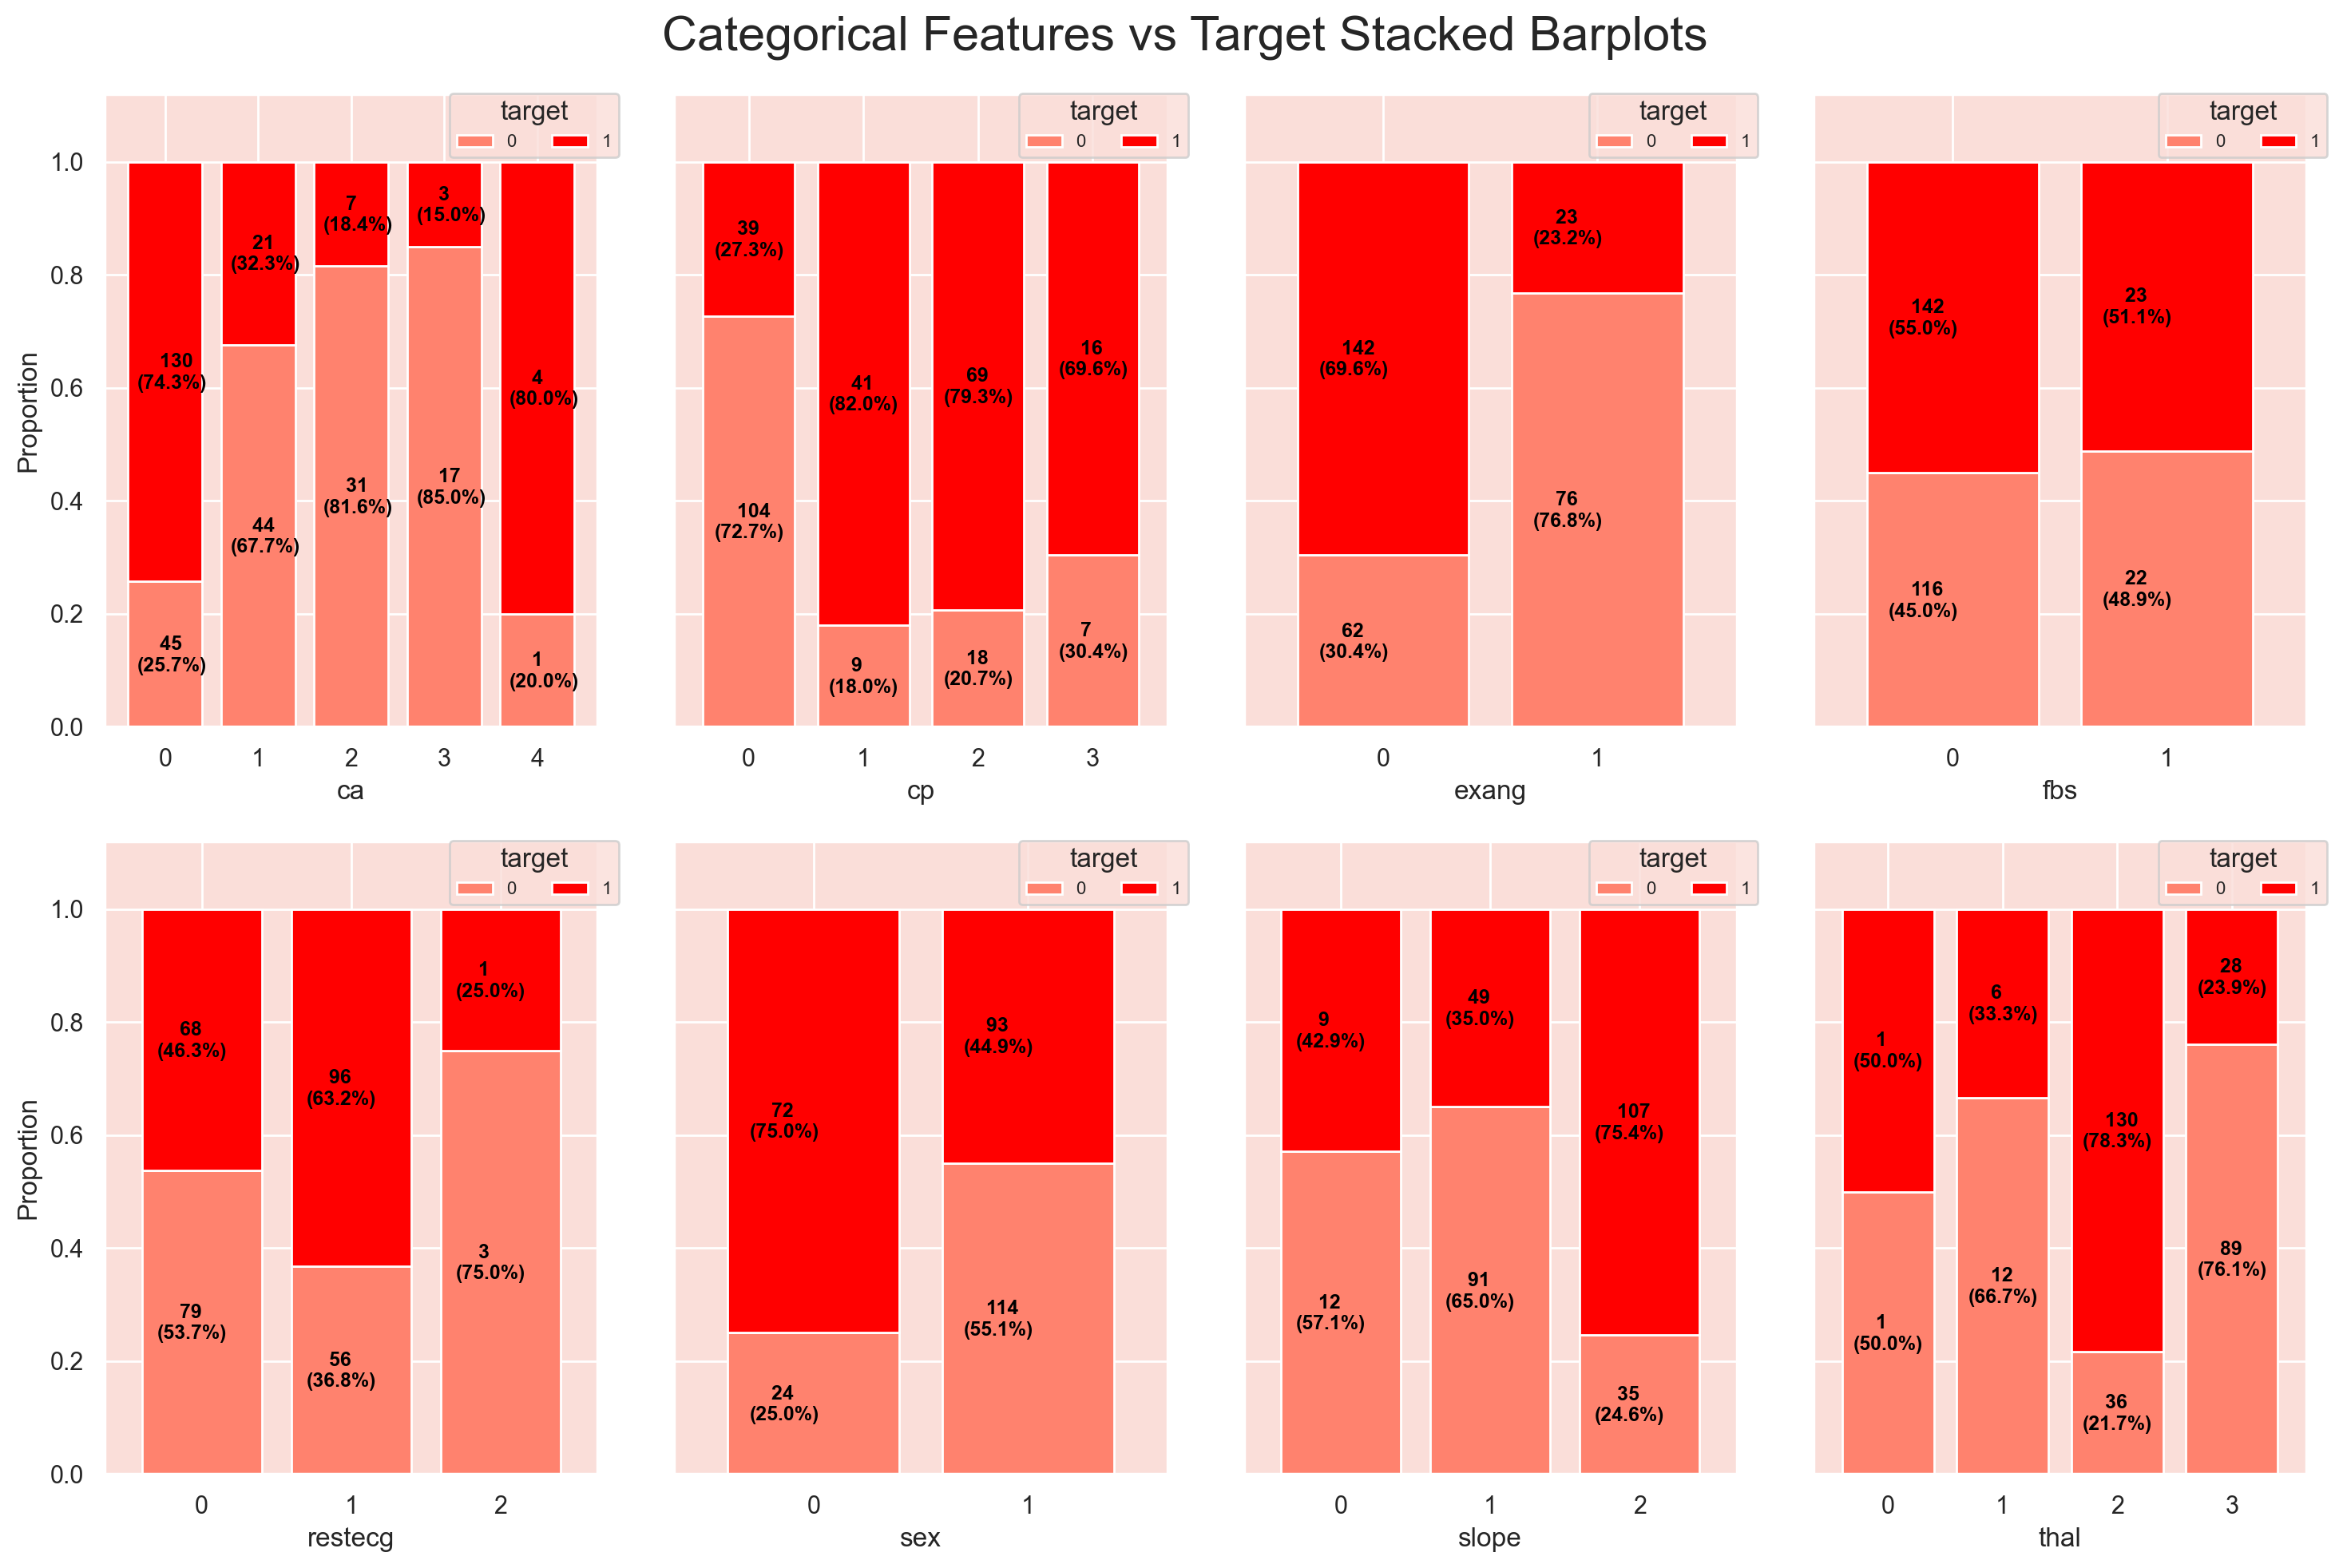

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')
    cmp = ListedColormap(['#ff826e', 'red'])
    x, y = i//4, i%4 
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp, legend=False, ylabel='Proportion', sharey=True)
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03, s = f'    {count}\n({np.round(proportion * 100, 1)}%)', color = "black", fontsize=9, fontweight="bold")
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

### Inferences:

- **Number of Major Vessels (ca)**: The majority of patients with heart disease have fewer major vessels colored by fluoroscopy. As the number of colored vessels increases, the proportion of patients with heart disease tends to decrease. Especially, patients with 0 vessels colored have a higher proportion of heart disease presence.

- **Chest Pain Type (cp)**: Different types of chest pain present varied proportions of heart disease. Notably, types 1, 2, and 3 have a higher proportion of heart disease presence compared to type 0. This suggests the type of chest pain can be influential in predicting the disease.

- **Exercise Induced Angina (exang)**: Patients who did not experience exercise-induced angina (0) show a higher proportion of heart disease presence compared to those who did (1). This feature seems to have a significant impact on the target.

- **Fasting Blood Sugar (fbs)**: The distribution between those with fasting blood sugar > 120 mg/dl (1) and those without (0) is relatively similar, suggesting fbs might have limited impact on heart disease prediction.

- **Resting Electrocardiographic Results (restecg)**: Type 1 displays a higher proportion of heart disease presence, indicating that this feature might have some influence on the outcome.

- **Sex (sex)**: Females (1) exhibit a lower proportion of heart disease presence compared to males (0). This indicates gender as an influential factor in predicting heart disease.

- **Slope of the Peak Exercise ST Segment (slope)**: The slope type 2 has a notably higher proportion of heart disease presence, indicating its potential as a significant predictor.

- **Thalium Stress Test Result (thal)**: The reversible defect category (2) has a higher proportion of heart disease presence compared to the other categories, emphasizing its importance in prediction.

### In summary, based on the visual representation:
- **Higher Impact on Target**: ca, cp, exang, sex, slope, and thal
- **Moderate Impact on Target**: restecg
- **Lower Impact on Target**: fbs


## Step 5 | Data Preprocessing

### Step 5.1 | Irrelevant Features Removal

All features in the dataset appear to be relevant based on our EDA. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.
kol el feauters leeha ta2seer 3la el target f ana ma2darsh asheel 7aga men el feauters 3shan may7salsh moshkela

### Step 5.2 | Missing Value Treatment

In [19]:
print(f"The total number of the missing values in the data is {df.isnull().sum().sum()}")

The total number of the missing values in the data is 0


Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

### Step 5.3 | Outlier Treatment

I am going to check for outliers using the IQR method for the continuous features:

In [20]:
print(continous_feauters)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [21]:
Q1 = df[continous_feauters].quantile(0.25) 
Q3 = df[continous_feauters].quantile(0.75) 
IQR = Q3 - Q1
outliers_count_specified = ((df[continous_feauters] < Q1-1.5*IQR) | (df[continous_feauters] > Q3+1.5*IQR)).sum()
print(outliers_count_specified)

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


### Outliers Identified for Continuous Features:

- **Resting Blood Pressure (trestbps)**: 9 outliers
- **Serum Cholesterol (chol)**: 5 outliers
- **Maximum Heart Rate Achieved (thalach)**: 1 outlier
- **ST Depression (oldpeak)**: 5 outliers
- **Age (age)**: No outliers


### Sensitivity to Outliers:

- **SVM (Support Vector Machine)**:  
  SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.

- **Decision Trees (DT) and Random Forests (RF)**:  
  These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.

- **K-Nearest Neighbors (KNN)**:  
  KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.

- **AdaBoost**:  
  This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

### Approaches for Outlier Treatment:

- **Removal of Outliers**:  
  Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

- **Capping Outliers**:  
  Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.

- **Transformations**:  
  Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.

- **Robust Scaling**:  
  Techniques like the `RobustScaler` in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

### Conclusion:

Given the nature of the algorithms (especially **SVM** and **KNN**) and the small size of our dataset, direct removal of outliers might not be the best approach. Instead, we'll focus on applying transformations like **Box-Cox** in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.


### Step 5.4 | Categorical Features Encoding

### One-hot Encoding Decision:

Based on the feature descriptions, here's the approach for one-hot encoding:

- **Nominal Variables**: These variables have no inherent order and should be one-hot encoded to prevent introducing unintended order into the model.

- **Ordinal Variables**: These variables have an inherent order and don't necessarily need one-hot encoding since their order provides meaningful information to the model.

Given this explanation:

- **sex**: This is a binary variable with two categories (male and female), so it doesn't need one-hot encoding.

- **cp**: Chest pain type can be considered nominal because there's no clear ordinal relationship among the different types of chest pain (e.g., Typical angina, Atypical angina, etc.). It should be one-hot encoded.

- **fbs**: This is a binary variable (true or false), so it doesn't need one-hot encoding.

- **restecg**: This represents the resting electrocardiographic results. Results such as "Normal", "Having ST-T wave abnormality", and "Showing probable or definite left ventricular hypertrophy" don't have an ordinal relationship, so it should be one-hot encoded.

- **exang**: This is a binary variable (yes or no), so it doesn't need one-hot encoding.

- **slope**: This represents the slope of the peak exercise ST segment. Descriptions like Upsloping, Flat, and Downsloping suggest an ordinal nature. Therefore, it doesn't need one-hot encoding.

- **ca**: This represents the number of major vessels colored by fluoroscopy. As a count variable with an inherent ordinal relationship, it doesn't need one-hot encoding.

- **thal**: This represents the result of a thalium stress test. Different states, such as "Normal", "Fixed defect", and "Reversible defect", suggest a nominal nature. Thus, it should be one-hot encoded.

### Summary:
- **Need One-Hot Encoding**: cp, restecg, thal
- **Don't Need One-Hot Encoding**: sex, fbs, exang, slope, ca


In [22]:
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)
label_encoder = LabelEncoder()
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)
bool_columns = df_encoded.select_dtypes(include='bool').columns 
df_encoded[bool_columns] = df_encoded[bool_columns].astype("uint8")
df_encoded.dtypes


age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [23]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0


### Step 5.5 | Feature Scaling

### Feature Scaling in Preprocessing

Feature Scaling is a crucial preprocessing step for algorithms that are sensitive to the magnitude or scale of features. Models like **SVM**, **KNN**, and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.

### Why We Skip It Now

While feature scaling is vital for some models, not all algorithms require scaled data. For instance, **Decision Tree-based models** are scale-invariant. Given our intent to use a mix of models (some requiring scaling, others not), we've chosen to handle scaling later using **pipelines**. This approach lets us apply scaling specifically for models that benefit from it, ensuring flexibility and efficiency in our modeling process.


### Step 5.6 | Transforming Skewed Features

Box-Cox transformation is a powerful method to stabilize variance and make the data more normal-distribution-like. It's particularly useful when you're unsure about the exact nature of the distribution you're dealing with, as it can adapt itself to the best power transformation. However, the Box-Cox transformation only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.

### Transforming Skewed Features & Data Leakage Concerns

When preprocessing data, especially applying transformations like the **Box-Cox**, it's essential to be wary of **data leakage**. Data leakage refers to a mistake in the preprocessing of data in which information from outside the training dataset is used to transform or train the model. This can lead to overly optimistic performance metrics.

To avoid data leakage and ensure our model generalizes well to unseen data:

1. **Data Splitting**:  
   We'll first split our dataset into a training set and a test set. This ensures that we have a separate set of data to evaluate our model's performance, untouched during the training and preprocessing phases.

2. **Box-Cox Transformation**:  
   We'll examine the distribution of the continuous features in the training set. If they appear skewed, we'll apply the Box-Cox transformation to stabilize variance and make the data more normal-distribution-like. Importantly, we'll determine the Box-Cox transformation parameters solely based on the training data.

3. **Applying Transformations to Test Data**:  
   Once our transformation parameters are determined from the training set, we'll use these exact parameters to transform our validation/test set. This approach ensures that no information from the validation/test set leaks into our training process.

4. **Hyperparameter Tuning & Cross-Validation**:  
   Given our dataset's size, to make the most of the available data during the model training phase, we'll employ **cross-validation** on the training set for hyperparameter tuning. This allows us to get a better sense of how our model might perform on unseen data, without actually using the test set. The test set remains untouched during this phase and is only used to evaluate the final model's performance.

By following this structured approach, we ensure a rigorous training process, minimize the risk of data leakage, and set ourselves up to get a realistic measure of our model's performance on unseen data.


In [24]:
X = df_encoded.drop("target", axis = 1) 
y = df_encoded["target"] 
class_counts = y.value_counts()
print(class_counts)
class_ratios = class_counts / len(y) 
print(class_ratios)

target
1    165
0    138
Name: count, dtype: int64
target
1    0.544554
0    0.455446
Name: count, dtype: float64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)
print(y.value_counts())
print(y.value_counts()/len(y))
print(y_train.value_counts()) 
print(y_test.value_counts()) 
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))

target
1    165
0    138
Name: count, dtype: int64
target
1    0.544554
0    0.455446
Name: count, dtype: float64
target
1    132
0    110
Name: count, dtype: int64
target
1    33
0    28
Name: count, dtype: int64
target
1    0.545455
0    0.454545
Name: count, dtype: float64
target
1    0.540984
0    0.459016
Name: count, dtype: float64


In [27]:
print(continous_feauters)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


The Box-Cox transformation requires all data to be strictly positive. To transform the oldpeak feature using Box-Cox, we can add a small constant (e.g., 0.001) to ensure all values are positive:

In [28]:
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

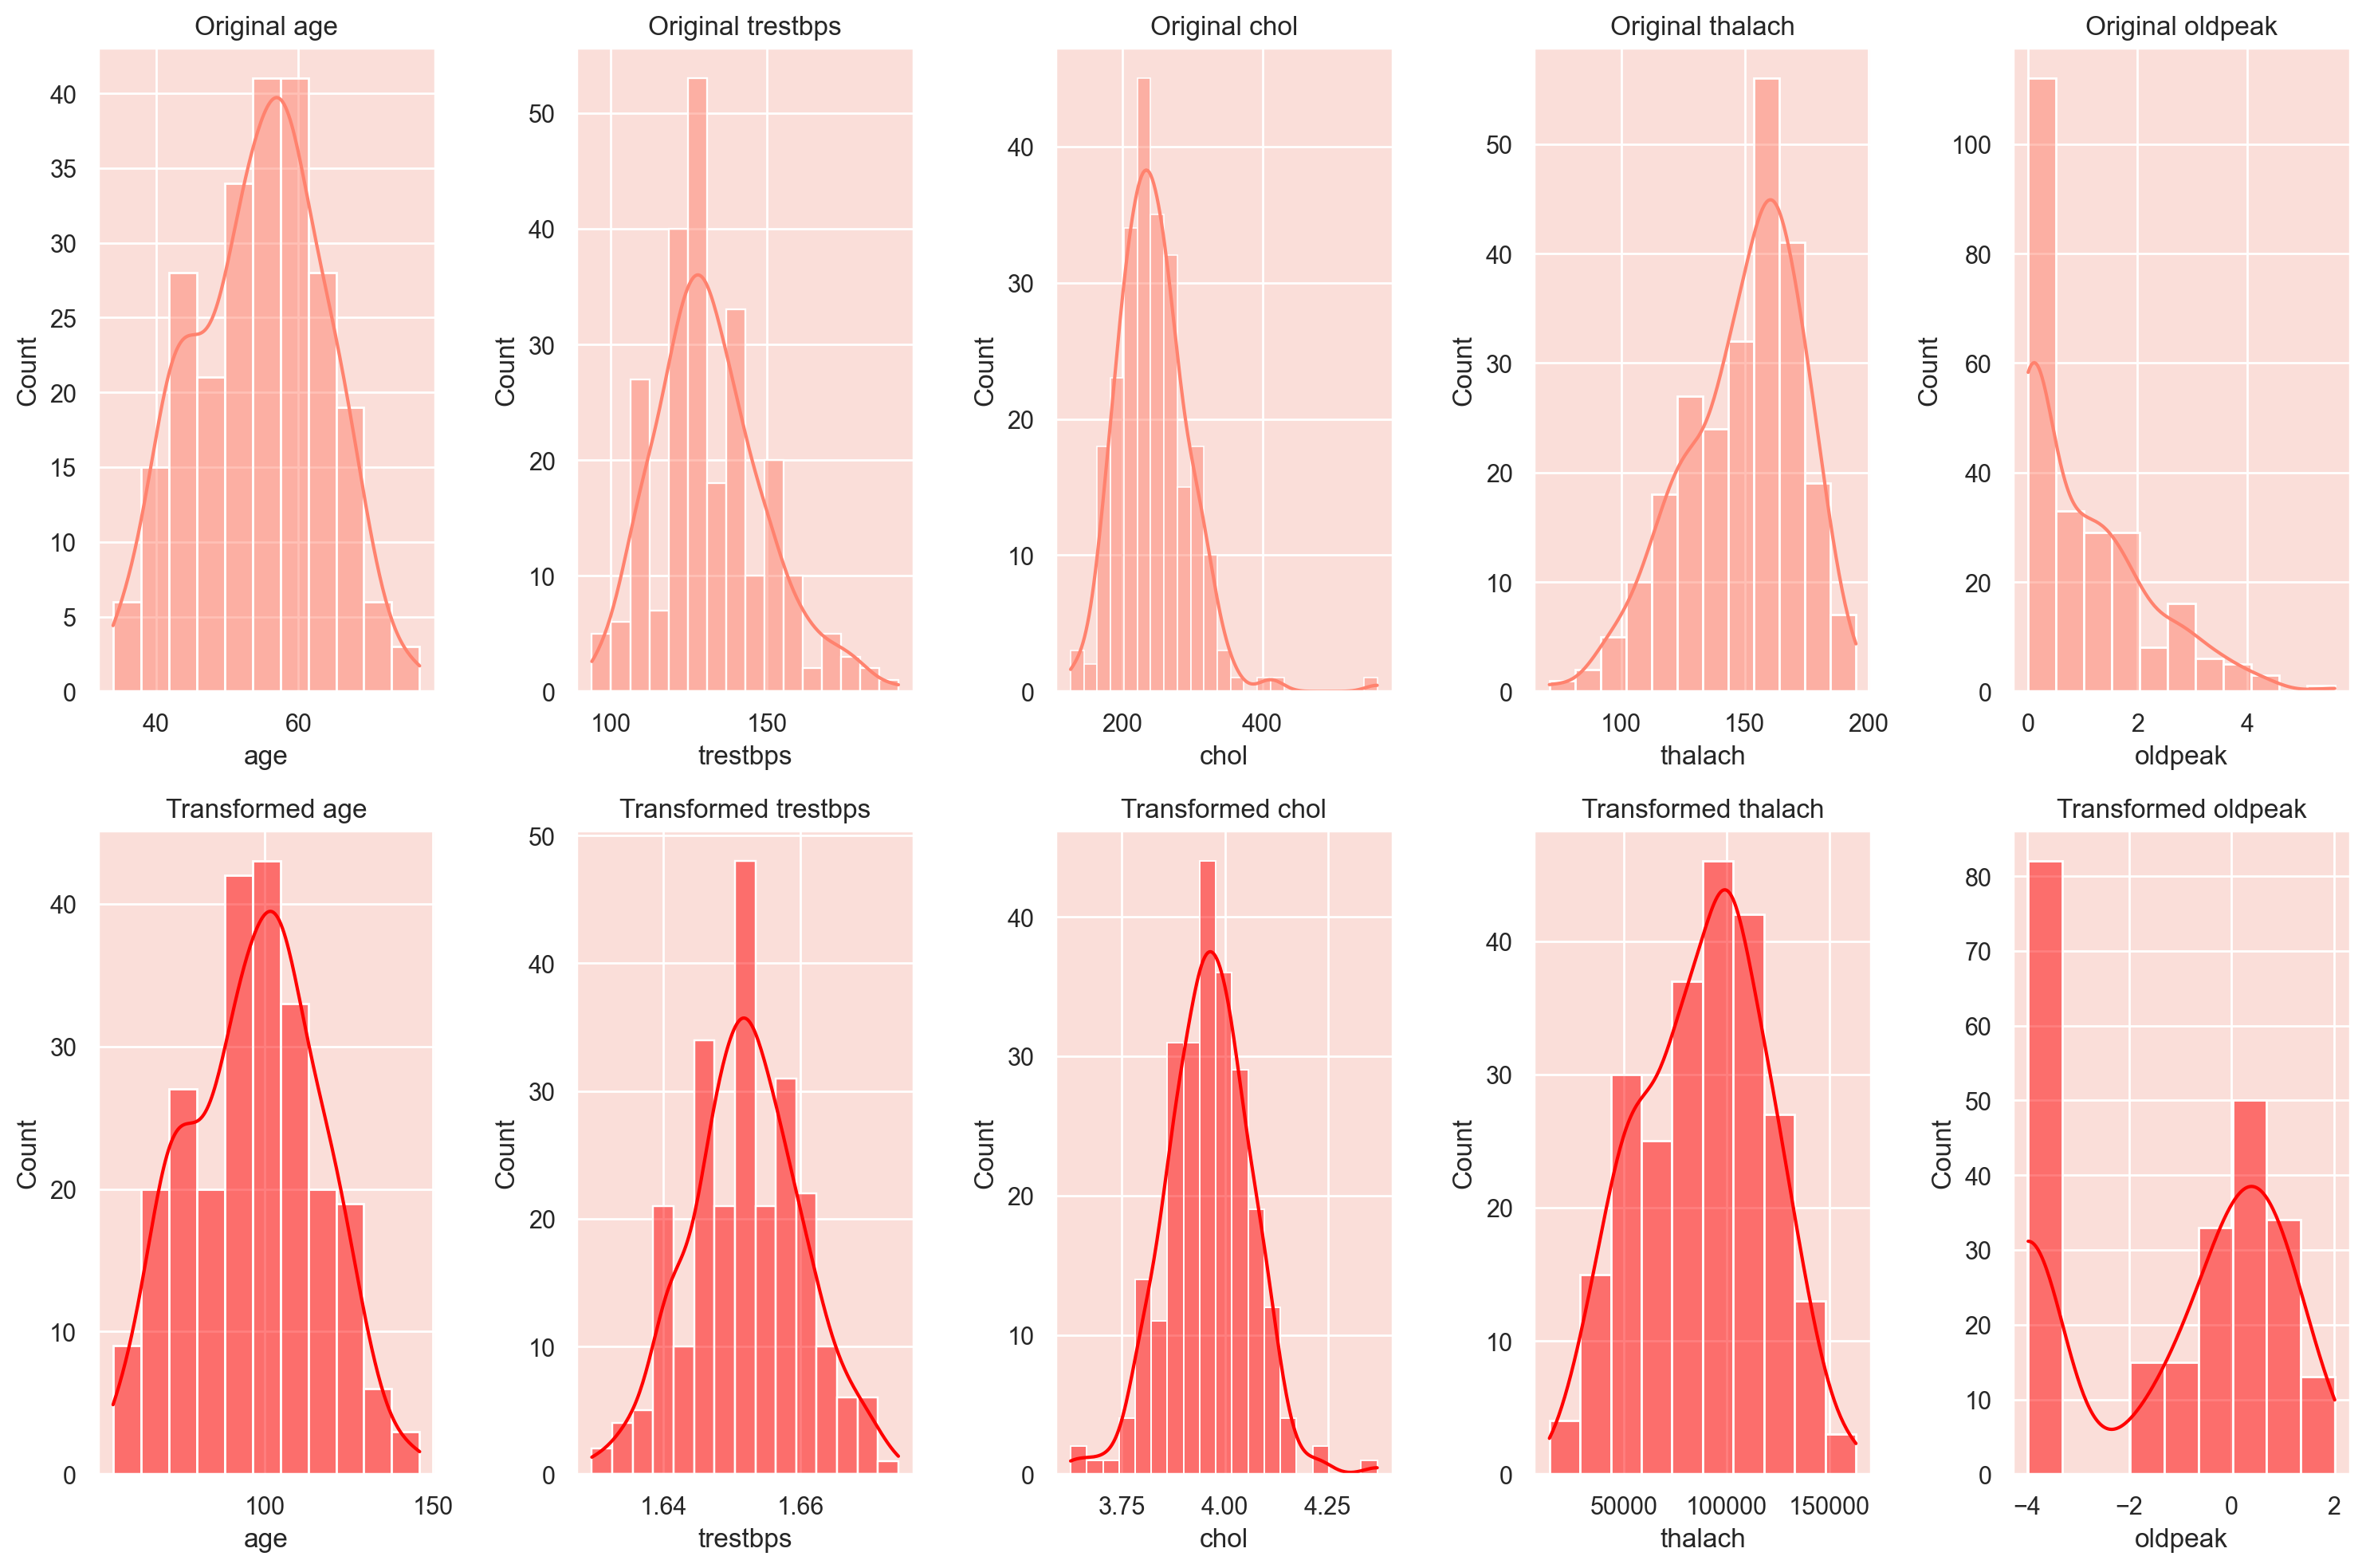

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(15,10)) 
for i, col in enumerate(continous_feauters): 
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')    
lambdas = {}
for i, col in enumerate(continous_feauters): 
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col]) 
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')
fig.tight_layout()
plt.show()

### Inference:

1. **Age**: 
   - The transformation has made the age distribution more symmetric, bringing it closer to a normal distribution.

2. **Trestbps**: 
   - The distribution of `trestbps` post-transformation appears to be more normal-like, with reduced skewness.

3. **Chol**: 
   - After applying the Box-Cox transformation, `chol` exhibits a shape that's more aligned with a normal distribution.

4. **Thalach**: 
   - The `thalach` feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

5. **Oldpeak**: 
   - The transformation improved the `oldpeak` distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.


### Conclusion:

Transforming features to be more normal-like primarily helps in mitigating the impact of outliers, which is particularly beneficial for distance-based algorithms like SVM and KNN. By reducing the influence of outliers, we ensure that these algorithms can compute distances more effectively and produce more reliable results.


In [30]:
X_train.head() 

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,99.775363,1,1.652121,4.044511,1,34193.227632,1,0.490856,0,0,0,0,0,0,0,0,0,1
191,104.060287,1,1.651135,3.909224,0,61564.640490,1,0.846853,1,3,0,0,0,0,0,0,0,1
15,87.096593,0,1.646937,3.916243,0,97354.894861,0,0.490856,1,0,0,1,0,1,0,0,1,0
224,95.519188,1,1.641028,3.960431,0,55975.891019,1,1.130195,1,1,0,0,0,1,0,0,0,1
250,89.190732,1,1.656716,4.069855,0,51729.486474,1,1.634849,1,3,0,0,0,1,0,0,0,1


## Step 6 | Decision Tree Model Building

### Step 6.1 | DT Base Model Definition

First, let's define the base DT model:

In [31]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

### Step 6.2 | DT Hyperparameter Tuning

🔍 **Note**: In medical scenarios, especially in the context of diagnosing illnesses, it's often more important to have a high recall (sensitivity) for the positive class (patients with the condition). A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.


I am establishing a function to determine the optimal set of hyperparameters that yield the highest recall for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:

In [32]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    clf_grid.fit(X_train, y_train) 
    best_hyperparameters = clf_grid.best_params_
    return clf_grid.best_estimator_, best_hyperparameters

I'll set up the hyperparameters grid and utilize the tune_clf_hyperparameters function to pinpoint the optimal hyperparameters for our DT model:

In [33]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [34]:
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('Decision Tree Optimal Hyperparameters: \n', best_dt_hyperparams)

Decision Tree Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Step 6.3 | DT Model Evaluation

Now let's evaluate our DT model performance on both the training and test datasets:

In [35]:
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



### Class 0:
- **Precision**: `0.73` (73% of predicted class 0 instances are correct)
- **Recall**: `0.75` (75% of actual class 0 instances were identified correctly)
- **F1-Score**: `0.74` (Harmonic mean of precision and recall)
- **Support**: `110` (There are 110 actual class 0 instances)

### Class 1:
- **Precision**: `0.78` (78% of predicted class 1 instances are correct)
- **Recall**: `0.77` (77% of actual class 1 instances were identified correctly)
- **F1-Score**: `0.78` (Harmonic mean of precision and recall)
- **Support**: `132` (There are 132 actual class 1 instances)

In [36]:
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



Given that the metric values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [37]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test) 
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = {
        "precision_0": report["0"]["precision"], 
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    return df

In [38]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'Decision Tree')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
Decision Tree,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


## Step 7 | Random Forest Model Building

### Step 7.1 | RF Base Model Definition

In [39]:
rf_base = RandomForestClassifier(random_state=0)

### Step 7.2 | RF Hyperparameter Tuning

Afterward, I am setting up the hyperparameters grid and utilize the tune_clf_hyperparameters function to pinpoint the optimal hyperparameters for our RF model:

In [40]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100], 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2, 3, 4], 
    'min_samples_split': [2, 3, 4, 5], 
    'min_samples_leaf': [1, 2, 3], 
    'bootstrap': [True, False] 
}

In [41]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('Random Forest Optimal Hyperparameters: \n', best_rf_hyperparams)

Random Forest Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


### Step 7.3 | RF Model Evaluation

##### Finally, I am evaluating the model's performance on both the training and test datasets:

In [42]:
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [43]:
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



##### The RF model's similar performance on both training and test data suggests it isn't overfitting.

In [44]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'Random Forest')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
Random Forest,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84


## Step 8 | KNN Model Building

###  Step 8.1 | KNN Base Model Definition

In [45]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

### Step 8.2 | KNN Hyperparameter Tuning

In [46]:
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)), 
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [47]:
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


### Step 8.3 | KNN Model Evaluation

Let's evaluate the model's performance on both the training and test datasets:

In [48]:
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [49]:
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



The KNN model's consistent scores across training and test sets indicate no overfitting.

In [50]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


## Step 9 | SVM Model Building

### Step 9.1 | SVM Base Model Definition

First, let's define the base SVM model and set up the pipeline with scaling:

In [51]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(probability=True)) 
])

### Step 9.2 | SVM Hyperparameter Tuning

Let's configure the hyperparameters grid and employ the tune_clf_hyperparameters function to determine the best hyperparameters for our SVM pipeline:

In [52]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [53]:
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


### Step 9.3 | SVM Model Evaluation

Let's evaluate our SVM model's performance on both the training and test datasets:3shan ashoof hal fy Overfitting wla la2

In [54]:
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [55]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



✅ **Inference:**

The **recall of 0.97** for class 1 indicates that almost all the true positive cases (i.e., patients with heart disease) are correctly identified. This high recall is of utmost importance in a medical context, where missing a patient with potential heart disease could have dire consequences.

However, it's also worth noting the balanced performance of the model. With an **F1-score of 0.83** for class 1, it's evident that the model doesn't merely focus on maximizing recall at the expense of precision. This means the reduction in False Negatives hasn't significantly increased the False Positives, ensuring that the cost and effort of examining healthy individuals are not unnecessarily high.

Overall, the model's performance is promising for medical diagnostics, especially when prioritizing the accurate identification of patients with heart disease without overburdening the system with false alarms.


In [56]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79


## Step 10 | Conclusion

In the critical context of diagnosing heart disease, our primary objective is to ensure a high recall for the positive class. It's imperative to accurately identify every potential heart disease case, as even one missed diagnosis could have dire implications. However, while striving for this high recall, it's essential to maintain a balanced performance to avoid unnecessary medical interventions for healthy individuals. We'll now evaluate our models against these crucial medical benchmarks.

In [57]:
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79
Random Forest,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84
Decision Tree,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


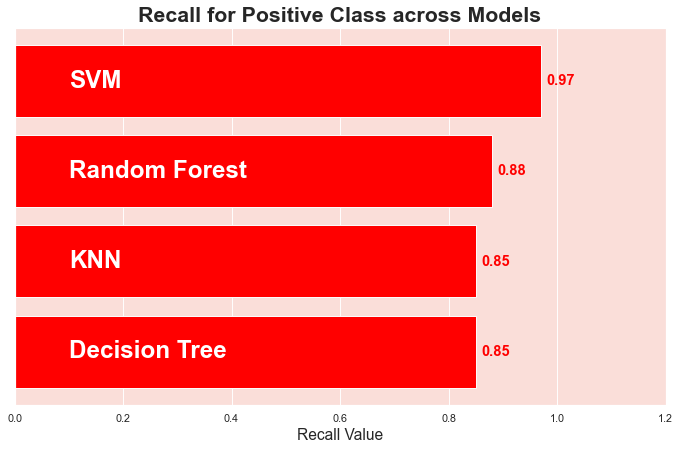

In [58]:
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1'] 
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)
ax.set_yticks([])
ax.set_xlim([0, 1.2])
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

The SVM model demonstrates a commendable capability in recognizing potential heart patients. With a recall of 0.97 for class 1, it's evident that almost all patients with heart disease are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts